<a href="https://colab.research.google.com/github/LizWY/Tensorflow/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load Data from tensorflow

In [0]:
# load handwriting mnist data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# normalize the data
x_train, x_test = x_train/255.0, x_test/255.0

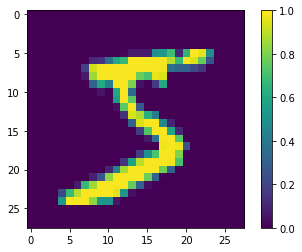

In [0]:
# show the image
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Build the model

In [0]:
# Define a callback function, when the accuracy hits 99% then stop epoch 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs ={}):
    if(logs.get('acc')>0.99):
        self.model.stop_training = True
        print('\nReached 99% accuracy so cancelling training!')

callbacks = myCallback()

# Set up layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10,activation = tf.nn.softmax)  
    ])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])
print(history.epoch, history.history['acc'][-1])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2619 - acc: 0.9249
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1174 - acc: 0.9657
Epoch 3/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0794 - acc: 0.9763
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0602 - acc: 0.9817
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0469 - acc: 0.9851
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0355 - acc: 0.9890
Epoch 7/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.0294 - acc: 0.9903
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0294 - acc: 0.9903
[0, 1, 2, 3, 4, 5, 6] 0.9902833


# Make predictions

Predict Number is 7 
Actual Number is 7


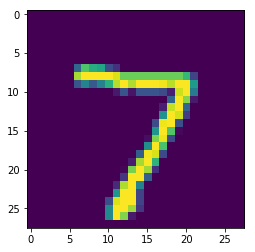

In [0]:
predictions = model.predict(x_test)
print("Predict Number is {} \nActual Number is {}".format(np.argmax(predictions[0]),y_test[0]))
plt.imshow(x_test[0])
plt.show()

#Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(x_test,  , verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.0721 - acc: 0.9787

Test accuracy: 0.9787


# Visualize the Predictions

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

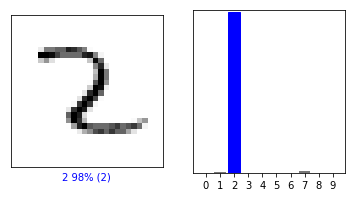

In [0]:
i = 2500
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()